In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [327]:
columns = ["id", "clump_thickness", "cell_size", "cell_shape", "marginal_adhesion", "epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

In [328]:
data = pd.read_csv("breast-cancer-wisconsin.data.csv", names=columns)

In [329]:
data.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [330]:
data.shape

(699, 11)

In [331]:
data.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [332]:
labels = {2: 0, 4: 1}

In [333]:
data["class"] = data["class"].apply(lambda x: labels[x])

In [335]:
data.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [336]:
data.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [337]:
data.dtypes

id                       int64
clump_thickness          int64
cell_size                int64
cell_shape               int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei             object
bland_chromatin          int64
normal_nucleoli          int64
mitoses                  int64
class                    int64
dtype: object

In [338]:
data["bare_nuclei"] = data["bare_nuclei"].replace('?', np.nan)

In [340]:
data["bare_nuclei"].isna().sum()

16

In [341]:
data["bare_nuclei"] = data["bare_nuclei"].fillna(data["bare_nuclei"].median())

In [342]:
data["bare_nuclei"].isna().sum()

0

In [343]:
counts = data["class"].value_counts()

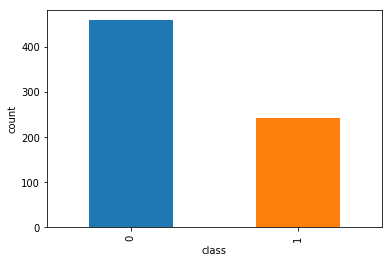

In [345]:
counts.plot(kind = "bar");
plt.xlabel("class");
plt.ylabel("count");

In [304]:
X = data.drop(["id", "class"], axis = 1)

In [305]:
X.head()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [306]:
y = data["class"]

In [307]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [310]:
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
82,5,2,1,1,2,1,3,1,1
51,5,3,3,4,2,4,3,4,1
220,1,1,1,2,2,1,3,1,1
559,5,1,1,1,2,1,2,1,1
544,2,1,3,2,2,1,2,1,1


(559, 9)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
158,1,1,2,1,3,1,1,1,1
499,4,1,1,1,2,1,2,1,1
396,3,1,1,1,2,1,3,1,1
155,5,5,5,6,3,10,3,1,1
321,3,1,1,1,2,1,3,1,1


(140, 9)

In [311]:
y_train.head()
y_train.shape
y_test.head()
y_test.shape

82     0
51     1
220    0
559    0
544    0
Name: class, dtype: int64

(559,)

158    0
499    0
396    0
155    1
321    0
Name: class, dtype: int64

(140,)

In [313]:
model = LogisticRegression()

In [314]:
model.fit(X_train, y_train)

/Users/upendra_35/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [315]:
pred = model.predict(X_test)

In [316]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0])

In [317]:
np.array(y_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0])

In [319]:
cnf_matrix = confusion_matrix(y_test, pred)

In [320]:
cnf_matrix

array([[94,  1],
       [ 3, 42]])

([<matplotlib.axis.XTick at 0x11e866be0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x11e86e940>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

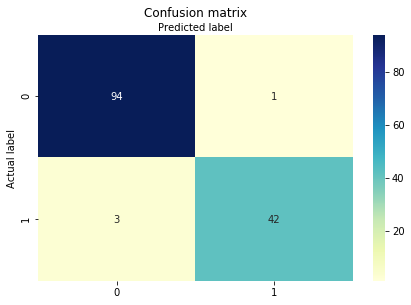

In [322]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [324]:
print("Accuracy score", round(accuracy_score(y_test, pred) * 100, 3))
print("Accuracy score", round(precision_score(y_test, pred) * 100, 3))
print("Accuracy score", round(recall_score(y_test, pred) * 100, 3))

Accuracy score 97.143
Accuracy score 97.674
Accuracy score 93.333


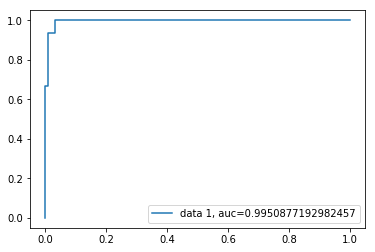

In [325]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [153]:
X.isna().sum()

clump_thickness         0
cell_size               0
cell_shape              0
marginal_adhesion       0
epithelial_cell_size    0
bare_nuclei             0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
dtype: int64

In [154]:
y.isna().sum()

0

In [158]:
data["bare_nuclei"]

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
       ..
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object